In [118]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
import ydata_profiling
from quickda.clean_data import *

In [119]:
# Leer archivo csv
df = pd.read_csv('./Datasets/CompleteDataset.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [120]:
df.describe()

,Unnamed: 0,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


En esta ocasión, y debido a la gran cantidad de columnas, se decidió no utilizar el profiler de pandas. Pero, se revisó en la página de dónde se obtuvieron los datos las gráficas sobre cada columna que este brindaba. De ella se pueden hacer las siguientes observaciones: 
- En las últimas columnas, el 10% de los datos son nulos. 
- Existen muchos datos atípicos
- No se pueden observar muy bien, pero las gráficas de GK son especiales, probablemente porque la mayoría de ellas aplican solo a los porteros. 


## Limpieza de datos

In [121]:
df['Curve'][412] # Se puede observar que los números no son todos numéricos

'60+7'

In [122]:
# Convertir las columnas no númericas a numéricas

In [123]:
df['Value'][0]

'€95.5M'

In [124]:
# Columna value de dinero a valor

for x in range(len(df['Value'])):
    og = df['Value'][x]
    temp = og.removeprefix('€')
    temp = temp.removesuffix('M')
    temp = temp.removesuffix('K')
    temp = float(temp)
    # convertir los números que eran
    if (og[len(og) - 1] == 'M'):
        temp = temp * 1000000
    if (og[len(og) - 1] == 'K'):
        temp = temp * 1000
    temp = int(temp)
    df.loc[x, 'Value'] = temp

df = df.astype({'Value':'int'})
df['Value']

0         95500000
1        105000000
2        123000000
3         97000000
4         61000000
           ...    
17976        50000
17977            0
17978        60000
17979        60000
17980        50000
Name: Value, Length: 17981, dtype: int32

In [125]:
# Columna Wage de dinero a valor

for x in range(len(df['Wage'])):
    og = df['Wage'][x]
    temp = og.removeprefix('€')
    temp = temp.removesuffix('M')
    temp = temp.removesuffix('K')
    temp = float(temp)
    # convertir los números que eran
    if (og[len(og) - 1] == 'M'):
        temp = temp * 1000000
    if (og[len(og) - 1] == 'K'):
        temp = temp * 1000
    temp = int(temp)
    df.loc[x, 'Wage'] = temp

df = df.astype({'Wage':'int'})
df['Wage']

0        565000
1        565000
2        280000
3        510000
4        230000
          ...  
17976      1000
17977      1000
17978      1000
17979      1000
17980      1000
Name: Wage, Length: 17981, dtype: int32

In [126]:
# De num + num a total
masCols = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing',
           'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK positioning', 
           'GK kicking', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots',
           'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
           'Sprint speed', 'Stamina', 'Standing tackle', 'Sprint speed', 'Stamina', 'Strength', 'Vision',
           'Volleys'
          ] # Columnas que sufren de este formato

for col in masCols:
    for x in range(len(df[col])):
        temp = df[col][x]
        if (type(temp) != int and type(temp) != np.int32): 
            if temp.__contains__('+'):
                temp2 = temp.split('+')
                a = int(temp2[0])
                b = int(temp2[1])
                temp = a + b
            elif temp.__contains__('-'):
                a = int(temp2[0])
                b = int(temp2[1])
                temp = a - b
            temp = int(temp)
        df.loc[x, col] = temp
        
    # cambiar el tipo de dato 
    df = df.astype({col: 'int'})

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  int32  
 11  Wage                 17981 non-null  int32  
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  int32  
 14  Aggression           17981 non-null  int32  
 15  Agility              17981 non-null 

<AxesSubplot: >

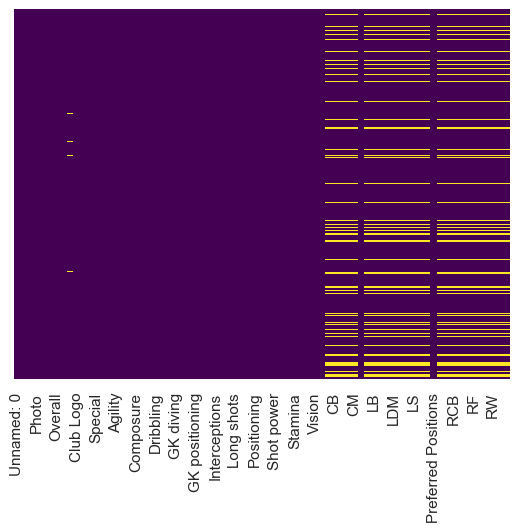

In [128]:
# Revisar datos nulos
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [129]:
# Botar las vacías en club
df.dropna(subset = ['Club'], inplace = True)

Según los las tablas que muestra donde se consiguieron los datos, para las columnas que se encuentran al final el 11% de los datos falta. Investigando sobre la data y sobre los jugadores, se pudo notar que Todos estos datos faltantes son de jugadores que juegan la posición
de portero, por lo que muchos de los atributos no cuentan para ellos. 

Por esa misma razón se decidión eliminar las columnas con datos faltantes en vez de elimninar a los jugadores para que de esa manera no se tomaran en cuenta todos los jugadores menos porteros. 

In [130]:
df.dropna(how='any', axis=1, inplace = True)

<AxesSubplot: >

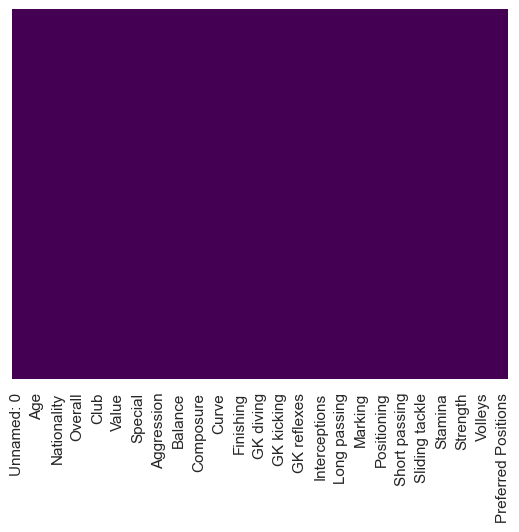

In [131]:
# Revisar si quedaron datos nulos
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17733 entries, 0 to 17980
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           17733 non-null  int64 
 1   Name                 17733 non-null  object
 2   Age                  17733 non-null  int64 
 3   Photo                17733 non-null  object
 4   Nationality          17733 non-null  object
 5   Flag                 17733 non-null  object
 6   Overall              17733 non-null  int64 
 7   Potential            17733 non-null  int64 
 8   Club                 17733 non-null  object
 9   Club Logo            17733 non-null  object
 10  Value                17733 non-null  int32 
 11  Wage                 17733 non-null  int32 
 12  Special              17733 non-null  int64 
 13  Acceleration         17733 non-null  int32 
 14  Aggression           17733 non-null  int32 
 15  Agility              17733 non-null  int32 
 16  Bala

## Modelo

Basado en: https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/

### Generación de dataframe con valores

In [172]:
df_X = df.drop(['Photo', 'Flag', 'Club Logo', 'Potential'], axis = 1)
X = df_X.iloc[:, :].values
X

array([[0, 'Cristiano Ronaldo', 32, ..., 88, 20801, 'ST LW '],
       [1, 'L. Messi', 30, ..., 85, 158023, 'RW '],
       [2, 'Neymar', 25, ..., 83, 190871, 'LW '],
       ...,
       [17978, 'J. Young', 17, ..., 33, 231381, 'ST '],
       [17979, 'J. Lundstram', 18, ..., 25, 238813, 'CM '],
       [17980, 'L. Sackey', 18, ..., 19, 238308, 'ST CB ']], dtype=object)

In [173]:
# y = df.iloc[:, 7].values
y = df.iloc[:, 7].values
y

array([94, 93, 94, ..., 61, 64, 64], dtype=int64)

### Separación del modelo

In [177]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 100)


In [178]:
X_entreno 

array([[16927, 'A. Galens', 19, ..., 5, 239309, 'GK '],
       [6813, 'Wanderson', 25, ..., 55, 230693, 'ST '],
       [14747, 'D. Evtimov', 23, ..., 21, 211090, 'GK '],
       ...,
       [12309, 'Maicon Sampinho', 25, ..., 58, 230499, 'RM CF ST '],
       [14363, 'T. Taufflieb', 24, ..., 50, 233729, 'RM RW '],
       [5730, 'T. Kempe', 28, ..., 62, 199413, 'RM ']], dtype=object)

In [179]:
y_entreno

array([70, 72, 68, ..., 63, 66, 70], dtype=int64)

## Impureza de Gini y otras funciones

In [212]:
def gini(y):
    # p = y.value_counts()/y.shape[0]
    p = np.unique(y, return_counts = True)[1]
    gini = 1-np.sum(p**2)
    return gini
    

In [213]:
def varianza(y):
    if (len(y) == 1):
        return 0
    else:
        return y.var();

In [214]:
def ganancia_info(y, mask, fun = gini):
    a = sum(mask)
    b = mask.shape[0] - a
    
    if (a == 0 or b == 0):
        ig  = 0
        
    else:
        if y.dtypes != 'O':
            ig = varianza(y) - (a/(a+b)* varianza(y[mask])) - (b/(a+b)*varianza(y[-mask]))
        else:
            ig = func(y)-a/(a+b)*func(y[mask])-b/(a+b)*func(y[-mask])
            
    return ig

In [218]:
import itertools

def opciones_categoricas(a):
    
    a = np.unique(a, return_counts = True)[1]
    
    opciones = []
    for L in range(len(a) + 1):
        for subset in itertootls.combinations(a, L):
            subset = list(subset)
            opciones.append(subset)
            
    return opciones[0:-1]

In [220]:
def max_ganancia_info_split(x, y, func=gini):
    
    split_value = []
    ig = []
    
    variable_num = True if x.dtypes != 'O' else FAlse
    
    # Crear opciones
    if variable_num:
        opciones = np.sort(np.unique(x))[1:]
    else:
        opciones = opciones_categoricas(x)
        
    # calcular ig para todos los valroes
    for val in opciones:
        mask = x < val if variable_num else x.isin(val)
        val_ig = ganancia_info(y, mak, func)
        
        # Agregar resultado
        ig.append(val_ig)
        split_value.append(val)
        
        
    if len(ig) == 0:
        return(None, None, None, False)
    
    else:
        best_gi = max(ig)
        best_ig_index = ig.index(best_ig)
        best_split = split_value[best_ig_index]
        return(best_ig,best_split,numeric_variable, True)

In [222]:
def get_mejor_split(y, data):
    masks = data.drop(y, axis = 1)

In [224]:
# Basado en https://medium.datadriveninvestor.com/easy-implementation-of-decision-tree-with-python-numpy-9ec64f05f8ae

class Nodo:
    def __init__(self):
        
        self.left = None
        self.right = None
        
        self.column = None
        self.threshold = None
        
        self.probas = None
        self.depht = None
        
        self.is_terminal = False

In [229]:
class ArbolDecision:
    def __init__(self, max_deph = 3, min_sample_leaf = 1, mins_sample_split = 2):
        
        self.max_deph = max_deph
        self.min_samples_leaf = min_samples_leaf
        self.min_sample_split = min_sample_split
        
        self.clases = None
        
        self.Tree = None
        
    def nodoProbas(self, y):
        probas = []
        
        for c in self.clases:
            proba = y[y == c].shape[0]/y.shape[0]
            probas.append(proba)
        return np.asarray(probas)
    
    def gini(self, probas):
        return 1 - np.sum(probas**2)
    
    def calcImpureza(self, y):
        return self.gini(self.nodoProbas(y))
    
    def calcMejorSplit(self, X, y):
        bestSplitCol = None
        bestTresh = None
        bestInfoGain = -999
        
        impurezaAnterior = self.calcImpureza(y)
        
        for c in range(x.shape[1]):
            x_col = x[:, c]
            
            for x_i in x_col:
                t = x_i # threshold
                y_der = u[x_col > t]
                y_iz = y[x_col <= t]
                
                if y_der.shape[0] == 0 or y_iz.shape[0] == 0:
                    continue
                    
                impurezaDer = self.calcImpureza(y_der)
                impurezaIz = self.calcImpureza(y_iz)
                
                gananciaInfo = impurezaAnterior
                gananciaInfo -= (impurezaIz * y_iz.shape[0])
                
                if gananciaInfo > bestInfoGain:
                    bsetSplitCol = c
                    bestThresh = t
                    bestInfoGain = gananciaInfo
                    
        if bestInfoGain == -999:
            return None, None, None, None, None, None
        
        x_col = X[:, bestSplitCol]
        x_iz, x_der = X[x_col <= bestThresh, :], X[x_col > bestTresh, :]
        y_iz, y_der = y[x_col <= bestThresh], y[x_col > bestThresh]
        
        return bestSplitCol, bestThresh, x_iz, y_iz, x_der, y_der
    
    def construccionArbl(self, X, y, nodo):
        if nodo.depth >= self.max_depth:
            node.is_terminal = True
            return 
        
        if X.shape[0] < self.min_samples_split:
            nodo.in_terminal = True
            return 
        
        if np.unique(y).shape[0] == 1:
            nodo.is_terminal = True
            return
        
        splitCol, thresh, x_iz, y_iz, x_der, y_der = self.calcMejorSplit(X, y)
        
        if splitCol is None:
            node.is_terminal = True
            
        if x_iz.shape[0] < self.min_samples_leafs or x_der.shape[0] < self.min_samples_leafs:
            node.is_terminal = True
            return
        
        nodo.column = splitCol
        nodo.threshold = thresh
        
        nodo.left = Nodo()
        nodo.left.depth = nodo.depth + 1
        nodo.left.probas = self.nodoProbas(y_iz)
        
        nodo.right = Nodo()
        nodo.right.depth = nodo.depth + 1
        nodo.rigth.probas = self.nodoProbas(y_der)
        
        self.construccionArbol(x_der, y_der, nodo.right)
        self.construccionArbol(x_iz, y_iz, nodo.left)
              
        
    
    def fit(self, X, y):
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
            
        self.clases = np.unique(y)
        
        self.Tree = Nodo()
        self.Tree.depth = 1
        self.Tree.probas = self.nodoProbas(y)
        
    def predictSamples(self, x, nodo)
    
    if nodo.is_terminal:
        return nodo.probas

    if x[nodo.column] > nodo.threshold:
        probas = self.predictSample(x, nodo.right)
    else:
        probas = self.predictSample(x, nodo.left)
        
    return probas
    
    def predict(self, x):
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
            
        predicciones = []
        
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predicciones.append(pred)
        
        return np.asarray(predicciones)